In [1]:
%matplotlib inline

import rnn
import numpy as np
from chainer import optimizers
import chainer.links as L
import chainer.functions as F
import matplotlib.pyplot as plt

In [2]:
epochs = 25 # epoch number.
nbatch = 12 # minibatch size.
ntrials = 1 # number of trials
ntime = 100 # number of time points
ninput = 3 # number of inputs
nhidden = 10 # number of hidden units
noutput = 3 # number of outputs

In [3]:
X = np.ones((ntrials,ntime,ninput)).astype(np.float32)
T = np.ones((ntrials,ntime,noutput)).astype(np.float32)

In [4]:
predictor = rnn.Predictor(L.LSTM(ninput,nhidden), L.Linear(nhidden,noutput))

In [5]:
net  = rnn.ANN(0, optimizers.Adam(), predictor, F.mean_squared_error)

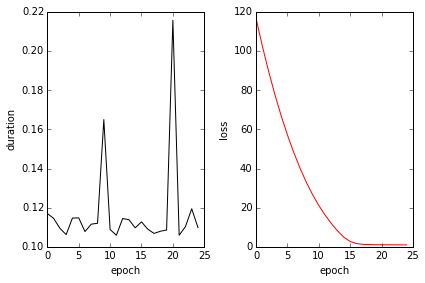

epoch: 24
duration: 0.109791040421
loss: 0.985617935658


In [6]:
net.train(T,X,epochs,nbatch)

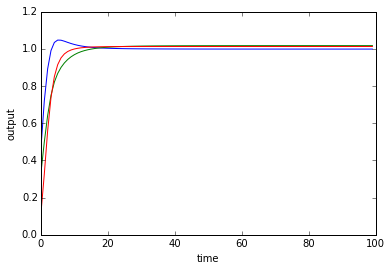

In [8]:
Z,_ = net.test(X)
plt.plot(np.squeeze(Z))
plt.xlabel('time')
plt.ylabel('output')

In [ ]:
import sys
print sys.path